<a href="https://colab.research.google.com/github/Yahia0mohamed/ML_projects/blob/main/Iris_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing important libraries

In [24]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math as m

# Read data from the `csv`

In [25]:
iris_data=pd.read_csv('/content/Iris.csv',index_col='Id')
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
new_cols=['sepal_length','sepal_width','petal_length','petal_width','target']
iris_data.columns=new_cols
#changed features names
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# visualize some `data`

<Axes: title={'center': 'petal length vs petal width'}, xlabel='petal_length', ylabel='petal_width'>

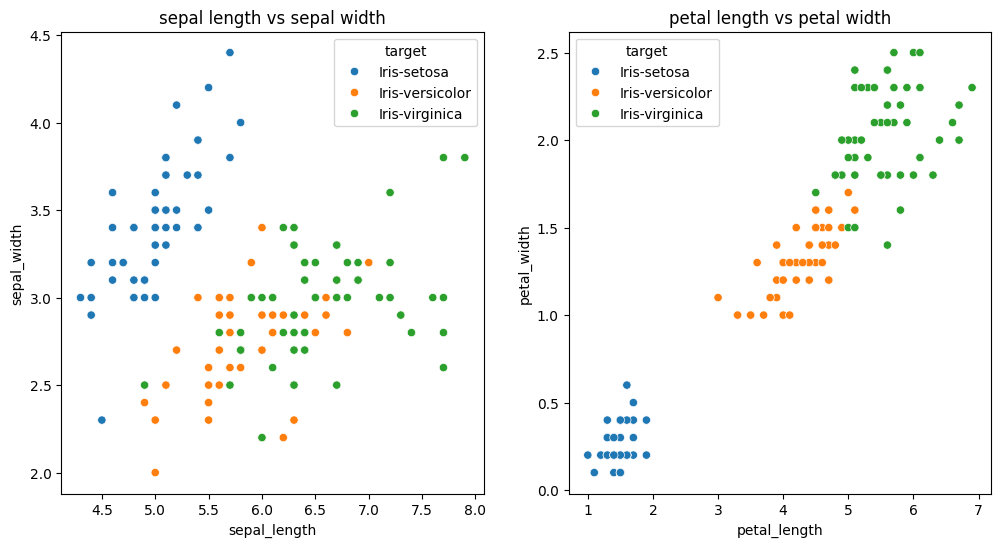

In [27]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.subplot(1, 2, 1) # make one row and two columns and position in 1
plt.title("sepal length vs sepal width")
sns.scatterplot(x=iris_data['sepal_length'],y=iris_data['sepal_width'],hue=iris_data['target'])
plt.subplot(1, 2, 2) #the second plot in the position 2
plt.title("petal length vs petal width")
sns.scatterplot(x=iris_data['petal_length'],y=iris_data['petal_width'],hue=iris_data['target'])

# preparing the data to be splited

In [28]:
iris_y=iris_data['target']
iris_x=iris_data.drop(columns='target')
x_train,x_test,y_train,y_test=train_test_split(iris_x,iris_y,test_size=0.2,random_state=42)
#done splitting the data with the test size is 20% from the size of the data frame

# building the `KNN`

In [29]:
def euclidean_distance(x1,x2):
  return m.sqrt(np.sum((x1-x2)**2))

def manhattan_distance(x1,x2):
  return np.sum(np.abs(x1-x2))

def cosineSimilarity_distance(x1,x2):
  return (np.dot(x1,x2))/((np.linalg.norm(x1))*(np.linalg.norm(x2)))


class Knn:
  def __init__(self,n_neighbors=0):
    self.__k=n_neighbors
    self.__data_x=0
    self.__data_y=0

  def fit(self,x,y):
    self.__data_x=x.values
    self.__data_y=y.values

  def predict(self,xT):
    test_data=xT
    euclidean_pred=[]
    manhattan_pred=[]
    cosineSimilarity_pred=[]
    #prediction using euclidean_distance
    for x in test_data:
      distances = np.array([])
      for y in self.__data_x:
        distance = euclidean_distance(x, y)
        distances = np.append(distances, distance)
      k_nearest_indices = np.argsort(distances)[:self.__k]#get the nearst distance indices
      k_nearest_labels = self.__data_y[k_nearest_indices]#get the corrisponding lable
      unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
      #returns returns two arrays An array containing the unique elements from the input array.An array containing the counts corresponding to each unique element in the input array.
      predicted_label = unique_labels[np.argmax(counts)]#predict the point as the largest frequancy from the present labels
      euclidean_pred.append(predicted_label)

    #prediction using manhattan_distance
    for x in test_data:
      distances = np.array([])
      for y in self.__data_x:
        distance = manhattan_distance(x, y)
        distances = np.append(distances, distance)
      k_nearest_indices = np.argsort(distances)[:self.__k]#get the nearst distance indices
      k_nearest_labels = self.__data_y[k_nearest_indices]#get the corrisponding lable
      unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
      #returns returns two arrays An array containing the unique elements from the input array.An array containing the counts corresponding to each unique element in the input array.
      predicted_label = unique_labels[np.argmax(counts)]#predict the point as the largest frequancy from the present labels
      manhattan_pred.append(predicted_label)
    #prediction using cosineSimilarity_distance
    for x in test_data:
      distances = np.array([])
      for y in self.__data_x:
        distance = cosineSimilarity_distance(x, y)
        distances = np.append(distances, distance)
      k_nearest_indices = np.argsort(distances)[::-1][:self.__k]#we reversed the array to get the greatest k similarities indices
      k_nearest_labels = self.__data_y[k_nearest_indices]#get the corrisponding lable
      unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
      #returns returns two arrays An array containing the unique elements from the input array.An array containing the counts corresponding to each unique element in the input array.
      predicted_label = unique_labels[np.argmax(counts)]#predict the point as the largest frequancy from the present labels
      cosineSimilarity_pred.append(predicted_label)

    #return the prediction in this manner so we can get some insights over the differences between the 3 distances
    preds={
        "euclidean":euclidean_pred,
        "manhattan":manhattan_pred,
        "cosine Similarity":cosineSimilarity_pred
    }
    return preds

# test our built `KNN` model

In [39]:
knnClassifier=Knn(n_neighbors=3)
knnClassifier.fit(x_train,y_train)
knnPreds=knnClassifier.predict(x_test.values)
euc_preds=np.array(knnPreds["euclidean"])
man_preds=np.array(knnPreds["manhattan"])
cos_preds=np.array(knnPreds["cosine Similarity"])
print(f"this test is done when k is 3\neuclidean accuracy={accuracy_score(y_test,euc_preds)*100}%\nmanhattan accuracy={accuracy_score(y_test,man_preds)*100}%\ncosine Similarity accuracy={accuracy_score(y_test,cos_preds)*100}%")
print(f"\nthe mismatched elements when k=3 is\neuclidean={np.sum(euc_preds != y_test.values)}\nmanhattan={np.sum(man_preds != y_test.values)}\ncosine Similarity={np.sum(cos_preds != y_test.values)}")

this test is done when k is 3
euclidean accuracy=100.0%
manhattan accuracy=100.0%
cosine Similarity accuracy=96.66666666666667%

the mismatched elements when k=3 is
euclidean=0
manhattan=0
cosine Similarity=1
